<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовить прототип модели машинного обучения для компании, разрабатывающей решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используются данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Этапы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Для выполнения проекта используются библиотеки *pandas*, *matplotlib* и *sklearn.*

## Подготовка данных

Импорт необходимых библиотек:

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from joblib import dump
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.dummy import DummyRegressor

Загружаем данные:

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Выводим данные на экран:

In [3]:
display(data_train.head())
display(data_test.head())
display(data_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Проверка эффективности обогащения:

In [5]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [6]:
data_train['rougher.output.recovery']
data_train['rougher.output.recovery_new'] = (C*(F-T))*100/(F*(C-T))
print(data_train['rougher.output.recovery'].head())
print(data_train['rougher.output.recovery_new'].head())

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64
0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery_new, dtype: float64


Найдем MAE между расчётами и значением признака:

In [7]:
mae = mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher.output.recovery_new'])
print(mae)

1.1131451184435918e-14


Получили маленькое значение MAE, эффективность обогащения рассчитана правильно.

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Признаки, недоступные в тестовой выборке: final, primary_cleaner.output, rougher.calculation, rougher.output, secondary_cleaner.output.

Типы признаков, недоступные в тестовой выборке: output(параметры продукта), calculation(расчётные характеристики).


Предобработка данных:

Данных с пропусками немного, удалим их:

In [9]:
data_train = data_train.dropna()
data_test = data_test.dropna()

## Анализ данных

Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки:

In [10]:
list_au = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
list_ag =['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
list_pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

In [11]:
print('au:')
for index in list_au:
    print(data_train[index].median())

au:
7.865763364331222
20.262236852091192
33.01723200164281
44.80219604107204


In [12]:
print('ag:')
for index in list_ag:
    print(data_train[index].median())

ag:
8.366434185592068
11.797794105273088
8.436412262281637
4.9993143840340295


In [13]:
print('pb:')
for index in list_pb:
    print(data_train[index].median())

pb:
3.444286957581838
7.7086928677558895
9.919856388833788
10.347530399693383


Концентрация металлов Au и Pb увеличиваются с каждым этапом очистки.

Концентрация металла Ag уменьшается после этапа флотации.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

In [14]:
print("Cреднее:", data_train['rougher.input.feed_size'].mean())

confidence_interval = st.t.interval(0.95, len(data_train['rougher.input.feed_size'])-1, data_train['rougher.input.feed_size'].mean(), data_train['rougher.input.feed_size'].sem())

print("95%-ый доверительный интервал:", confidence_interval)

Cреднее: 57.21512765553142
95%-ый доверительный интервал: (56.861921789947026, 57.56833352111581)


In [15]:
print("Cреднее:", data_test['rougher.input.feed_size'].mean())

confidence_interval = st.t.interval(0.95, len(data_test['rougher.input.feed_size'])-1, data_test['rougher.input.feed_size'].mean(), data_test['rougher.input.feed_size'].sem())

print("95%-ый доверительный интервал:", confidence_interval)

Cреднее: 55.86397810255099
95%-ый доверительный интервал: (55.35119018447313, 56.37676602062884)


Распределения не сильно отличаются друг от друга, оценка модели будет правильной.

 Исследование суммарной концентрации всех веществ на разных стадиях: 

в сырье:

In [16]:
data_train['input_sum'] = data_train['rougher.input.feed_sol']+data_train['rougher.input.feed_ag']+data_train['rougher.input.feed_pb']+data_train['rougher.input.feed_au']
print(data_train['input_sum'].median())

57.20814122736182


 в черновом концентрате:

In [17]:
data_train['rougher_sum'] = data_train['rougher.output.concentrate_sol']+data_train['rougher.output.concentrate_ag']+data_train['rougher.output.concentrate_pb']+data_train['rougher.output.concentrate_au']
print(data_train['rougher_sum'].median())

69.7014094629393


в финальном концентрате:

In [18]:
data_train['final_sum'] = data_train['final.output.concentrate_sol']+data_train['final.output.concentrate_ag']+data_train['final.output.concentrate_pb']+data_train['final.output.concentrate_au']
print(data_train['final_sum'].median())

69.46071463019544


Text(0, 0.5, 'amount')

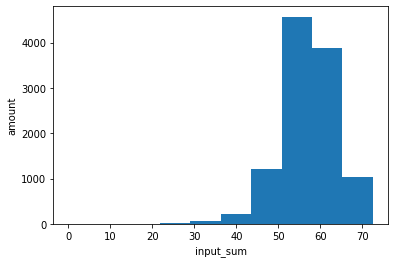

In [19]:
plt.hist(data_train['input_sum'])
plt.xlabel('input_sum')
plt.ylabel('amount')

Text(0, 0.5, 'amount')

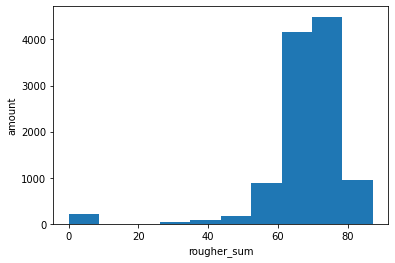

In [20]:
plt.hist(data_train['rougher_sum'])
plt.xlabel('rougher_sum')
plt.ylabel('amount')

Text(0, 0.5, 'amount')

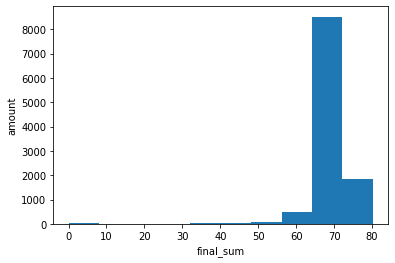

In [21]:
plt.hist(data_train['final_sum'])
plt.xlabel('final_sum')
plt.ylabel('amount')

Наибольшую суммарную концентрацию получили в финальном концентрате.
На графике распределений суммарных концентраций в черновом концентрате наблюдаются выбросы.

In [22]:
data_train = data_train[(data_train['final_sum']>10) | (data_train['rougher_sum']>10) | (data_train['input_sum']>10)]

## Модель

Функция для вычисления итогового sMAPE:

In [23]:
def smape(A, F):
    A = np.array(A)
    F = np.array(F)
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [24]:
def final_smape(smape_rougher, smape_final):
    return 0.25*smape_rougher+0.75*smape_final

Выбираем в обучающей выборке те же признаки, что и в тестовой выборке. Делим обучающую выборку на features и target:

In [25]:
list = []
list = data_test.columns
data_target_train_rougher = data_train['rougher.output.recovery']
data_target_train_final = data_train['final.output.recovery']
data_features_train = data_train.iloc[:, data_train.columns.isin(list)]
data_features_train = data_features_train.drop('date', axis = 1)

In [26]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(data_features_train)
data_features_train = scaler.transform(data_features_train)

Линейная регрессия, обучили на data_features_train, data_target_train_rougher:

In [27]:
from sklearn.metrics import make_scorer

In [28]:
model_regression_rougher = LinearRegression()
model_regression_rougher.fit(data_features_train, data_target_train_rougher)
metrics = make_scorer(score_func = smape, greater_is_better = True)
scores = cross_val_score(model_regression_rougher, data_features_train, data_target_train_rougher, scoring = metrics)
final_score = sum(scores)/len(scores)
dump(model_regression_rougher, 'model_9_1.joblib')
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 11.889852838831803


Линейная регрессия, обучили на data_features_train, data_target_train_final:

In [29]:
model_regression_final = LinearRegression()
model_regression_final.fit(data_features_train, data_target_train_final)
scores = cross_val_score(model_regression_final, data_features_train, data_target_train_final, scoring = metrics)
final_score = sum(scores)/len(scores)
dump(model_regression_final, 'model_9_1.joblib')
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 9.746097463456348


Случайный лес, обучили на data_features_train, data_target_train_rougher:

In [30]:
best_model_forest_rougher = None
best_result = 100
for est in range(1, 3):
    for depth in range (1, 3):
        model_forest = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(data_features_train, data_target_train_rougher)
        scores = cross_val_score(model_forest, data_features_train, data_target_train_rougher, scoring = metrics)
        final_score = sum(scores)/len(scores)
        if final_score < best_result:
            best_model_forest_rougher = model_forest
            best_result = final_score
print("Средняя оценка качества модели:", best_result)

Средняя оценка качества модели: 10.89550628731119


Случайный лес, обучили на data_features_train, data_target_train_final:

In [31]:
best_model_forest_final = None
best_result = 100
for est in range(1, 3):
    for depth in range (1, 3):
        model_forest = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(data_features_train, data_target_train_final)
        scores = cross_val_score(model_forest, data_features_train, data_target_train_final, scoring = metrics)
        final_score = sum(scores)/len(scores)
        if final_score < best_result:
            best_model_forest_final = model_forest
            best_result = final_score
print("Средняя оценка качества модели:", best_result)

Средняя оценка качества модели: 8.724734946525471


Лучшая модель: model_regression_final

Проверим модель на тестовой выборке:

target для тестовой выборки возьмем из data_full:

In [32]:
data_target_test_final = data_full.loc[:, ['date', 'final.output.recovery']]
data_target_test_rougher = data_full.loc[:, ['date', 'rougher.output.recovery']]

Отберем значения target по столбцу с датами из data_test:

In [33]:
list_of_dates = data_test['date']
data_target_test_final = data_target_test_final.query('date.isin(@list_of_dates)')
data_target_test_rougher = data_target_test_rougher.query('date.isin(@list_of_dates)')

data_target_test_final = data_target_test_final['final.output.recovery'].squeeze()
data_target_test_rougher = data_target_test_rougher['rougher.output.recovery'].squeeze()

In [34]:
data_target_test_final.shape , type(data_target_test_final), data_target_train_final.shape,  type(data_target_train_final)

((5229,), pandas.core.series.Series, (11016,), pandas.core.series.Series)

In [35]:
data_test = data_test.drop('date', axis = 1)
data_test = scaler.transform(data_test)

In [36]:
predicted_test_rougher = best_model_forest_rougher.predict(data_test)
predicted_test_final = best_model_forest_final.predict(data_test)

In [37]:
sm1 = smape(data_target_test_rougher, predicted_test_rougher)
sm2 = smape(data_target_test_final, predicted_test_final)
print('Итоговое sMAPE: ', final_smape(sm1, sm2))

Итоговое sMAPE:  9.403596604428074


Сравним sMAPE с константной моделью DummyRegressor:

In [38]:
model_check_r = DummyRegressor()
model_check_f = DummyRegressor()
model_check_r.fit(data_features_train, data_target_train_rougher)
model_check_f.fit(data_features_train, data_target_train_final)
pred_test_rougher = model_check_r.predict(data_test)
pred_test_final = model_check_f.predict(data_test)
sm1 = smape(data_target_test_rougher, pred_test_rougher)
sm2 = smape(data_target_test_final, pred_test_final)
print('Итоговое sMAPE: ', final_smape(sm1, sm2))

Итоговое sMAPE:  9.735458526983432


sMAPE нашей модели меньше sMAPE DummyRegressor, модель проверена на адекватность.

В ходе работы была проведена проверка эффективности обогащения. Выполнена предобработка данных; посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках и исследовали суммарную концентрацию всех веществ на разных стадиях.
Были обучены разные модели и оценено их качество кросс-валидацией. Выбрали лучшую модель и проверили её на тестовой выборке.

Получили высокое значение sMAPE, проверено качество модели best_model_forest_final.